In [1]:
# import numpy for numerical operations
import numpy as np

# import pandas for data handling using DataFrame
import pandas as pd

# import seaborn for statistical data visualization
import seaborn as sns

# import matplotlib for basic plotting
import matplotlib.pyplot as plt

# import scipy.stats for statistical functions and qq plots
import scipy.stats as stats

In [2]:
# import function to split data into train and test sets
from sklearn.model_selection import train_test_split

# import function for cross validation
from sklearn.model_selection import cross_val_score

# import LinearRegression model
from sklearn.linear_model import LinearRegression

# import r2_score to evaluate regression model
from sklearn.metrics import r2_score

# import PowerTransformer to reduce skewness in data
from sklearn.preprocessing import PowerTransformer

In [3]:
# load csv file into dataframe df
df = pd.read_csv('concrete_data.csv')

In [4]:
# display first 5 rows of dataframe
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# get number of rows and columns in dataset
df.shape

(1030, 9)

In [6]:
# count total missing values in each column
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [7]:
# get summary statistics for numerical columns
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


We see in some places the minimum value is zero

In [8]:
# drop 'Strength' column to create features x
x = df.drop(columns=['Strength'])

# select last column 'Strength' as target y
y = df.iloc[:, -1]

In [9]:
# split data into train and test sets
# 80% train, 20% test
# random_state=42 makes split reproducible
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Applying Regression without any Transformation**

In [10]:
# create LinearRegression model
lr = LinearRegression()

# train model on training data
lr.fit(x_train, y_train)

# predict target values for test data
y_pred = lr.predict(x_test)

# calculate r2 score to evaluate model performance
r2_score(y_test, y_pred)

0.627553179231485

In [11]:
# create LinearRegression model
lr = LinearRegression()

# perform cross validation to evaluate model
# splits data into folds, trains and tests on each
# calculates r2 score for each fold
# np.mean() gives average r2 score
np.mean(cross_val_score(lr, x, y, scoring='r2'))

np.float64(0.46099404916628606)

Obtained Result is very poor

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


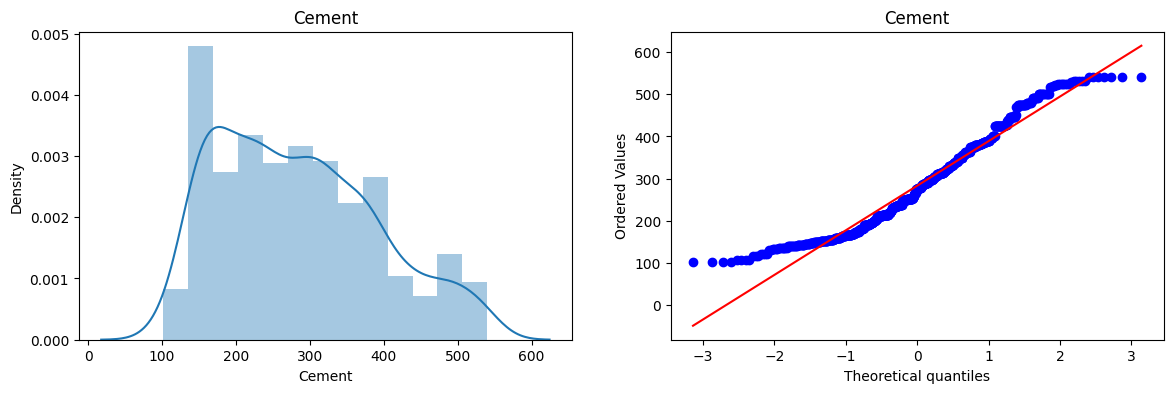

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


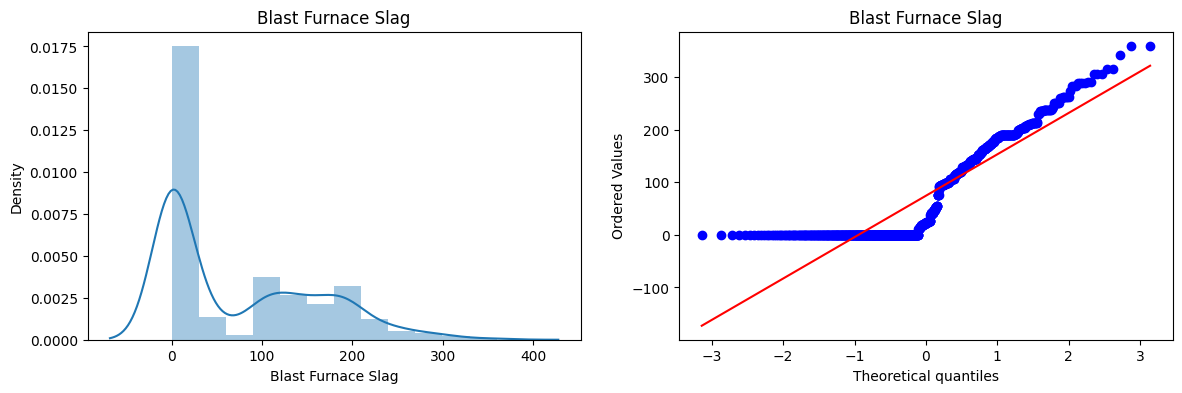

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


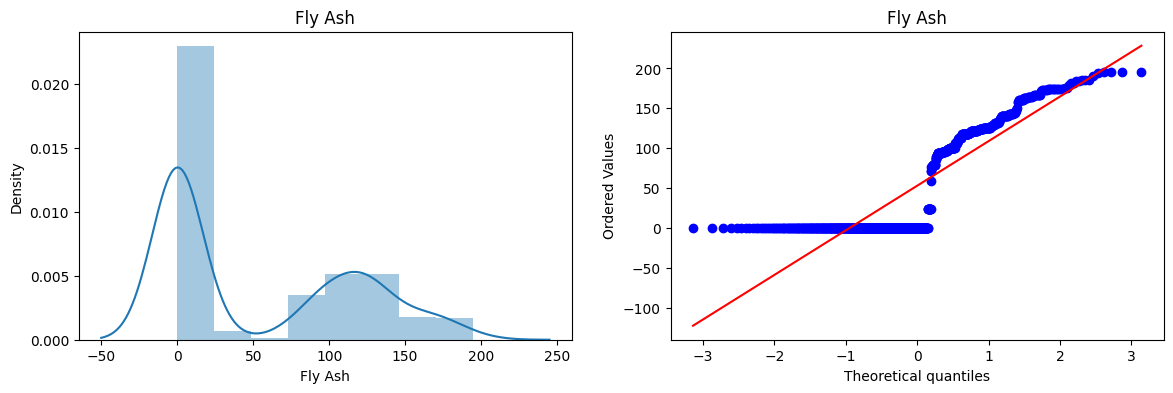

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


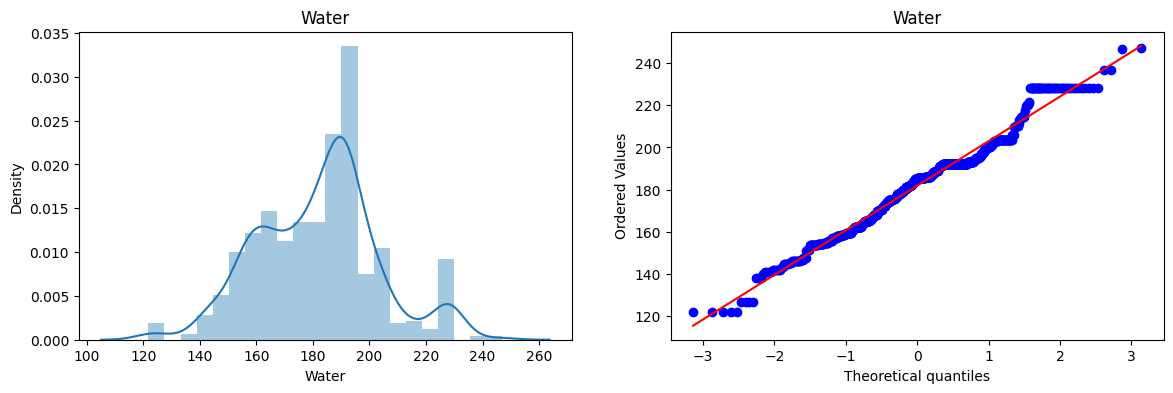

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


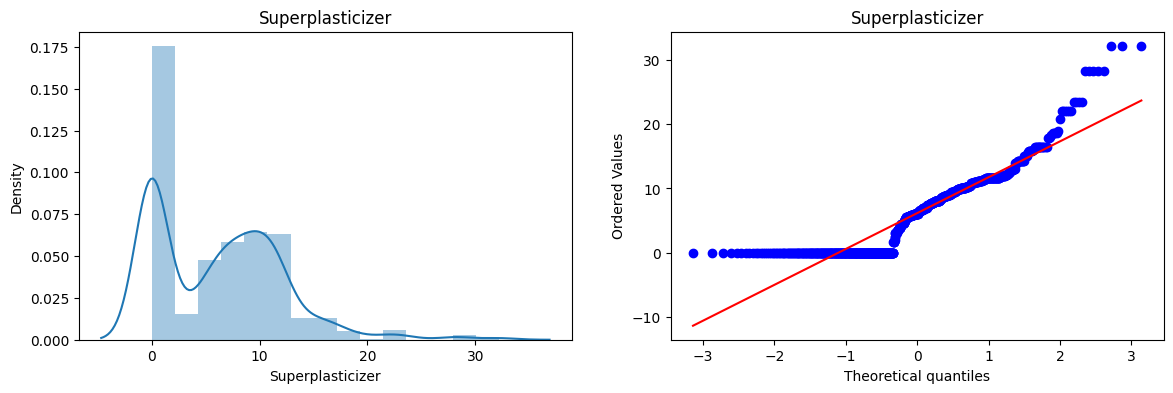

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


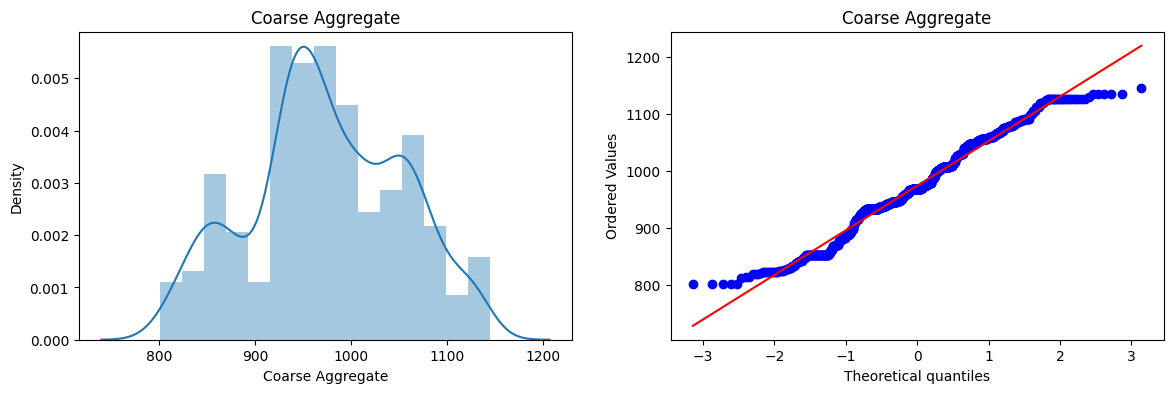

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


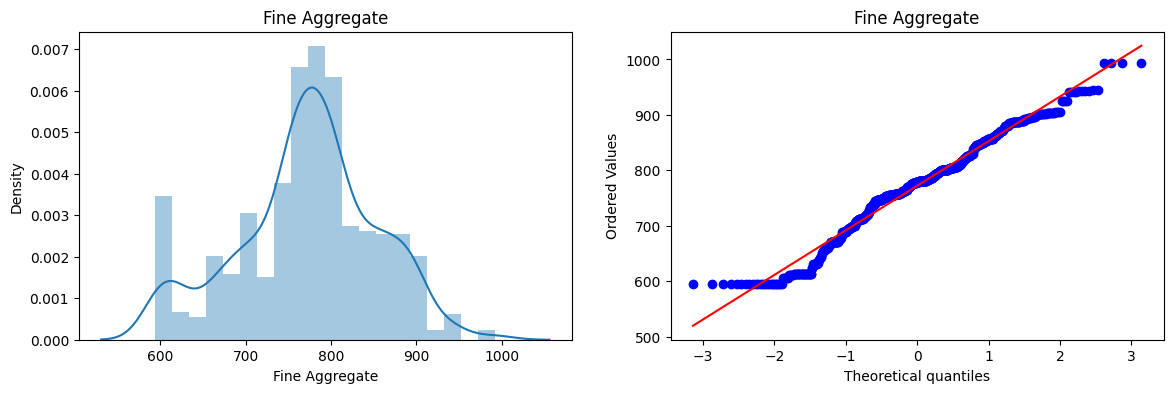

/tmp/ipython-input-3541294996.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])  # shows data spread


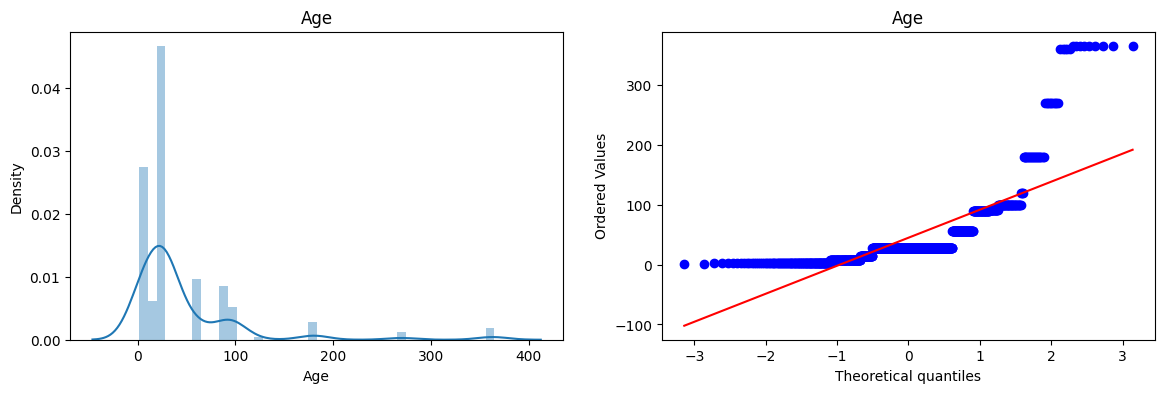

In [12]:
# plot graphs of features without any transformation

# loop through each column in training data
for col in x_train.columns:

  # create figure with wide layout
  plt.figure(figsize=(14, 4))

  # plot distribution of the column (histogram + kde)
  plt.subplot(121)
  sns.distplot(x_train[col])  # shows data spread
  plt.title(col)  # set column name as title

  # plot qq plot to check normality
  plt.subplot(122)
  stats.probplot(x_train[col], dist='norm', plot=plt)
  plt.title(col)  # set column name as title

  # display the plots
  plt.show()

- Cement is OK
- Blast Furnance Slag is Right Skewed
- Fly Ash is Bimodal
- Water is OK
- Superplasticizer is Bimodal and Right Skewed
- Coarse Aggregate is OK
- Fine Aggregate is OK
- Age is NOT OK

## **Applying Box-Cox Transform**

In [13]:
# create PowerTransformer using box-cox method
pt = PowerTransformer(method='box-cox')

# fit transformer on training data and apply box-cox
# add small value 0.000001 to avoid zero or negative issues
x_train_transformed = pt.fit_transform(x_train + 0.000001)

# apply same transformation to test data
x_test_transformed = pt.transform(x_test + 0.000001)

# display box-cox lambda values for each feature
# shows how much each column was transformed
pd.DataFrame({'cols': x_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


## **Applying Linear Regressioon on Transformed data**

In [14]:
# create LinearRegression model
lr = LinearRegression()

# train model on transformed training data (box-cox applied)
lr.fit(x_train_transformed, y_train)

# predict target values for transformed test data
y_pred2 = lr.predict(x_test_transformed)

# calculate r2 score to evaluate model performance
# closer to 1 means better predictions
r2_score(y_test, y_pred2)

0.8047824993083206

In [15]:
# apply box-cox transformation to features
# add small value 0.000001 to avoid zero or negative issues
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x + 0.000001)

# create LinearRegression model
lr = LinearRegression()

# perform cross validation on transformed data
# calculate average r2 score across folds
np.mean(cross_val_score(lr, x_transformed, y, scoring='r2'))

np.float64(0.6662950329054064)

## **Before & After comparision for Box-Cox Plot**

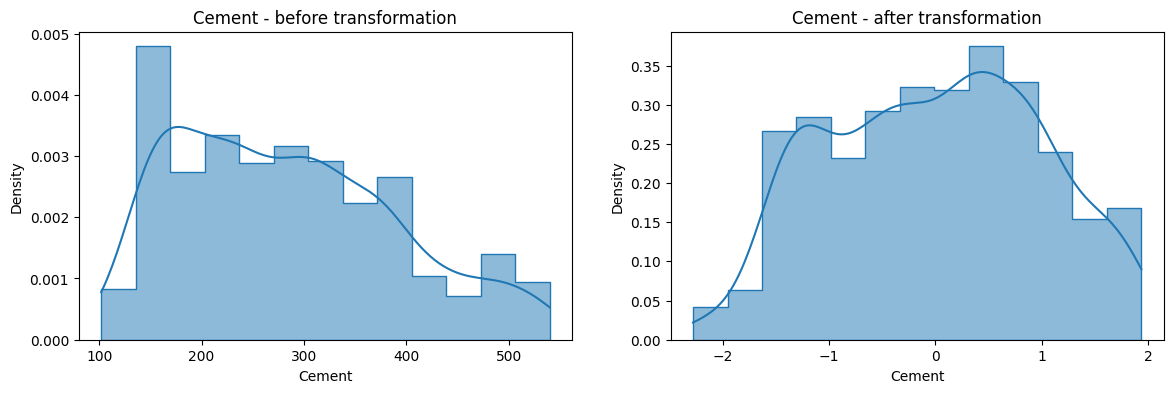

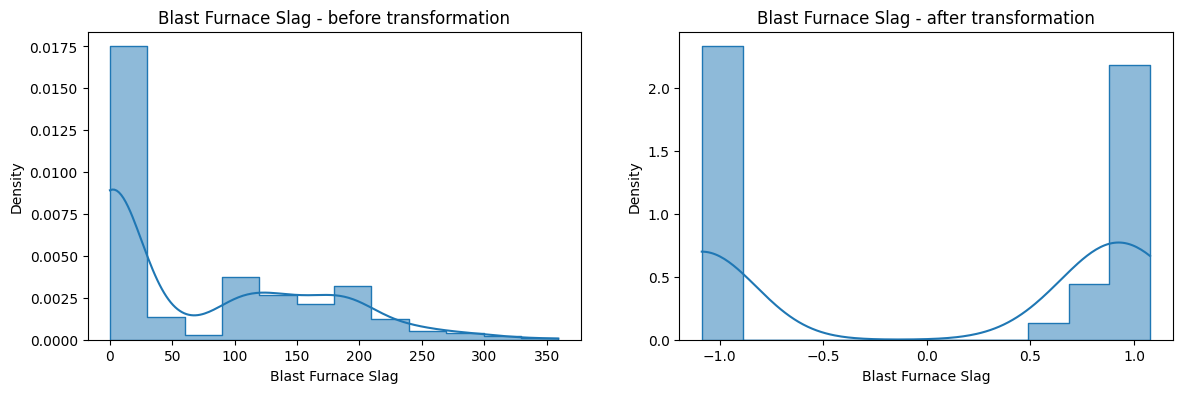

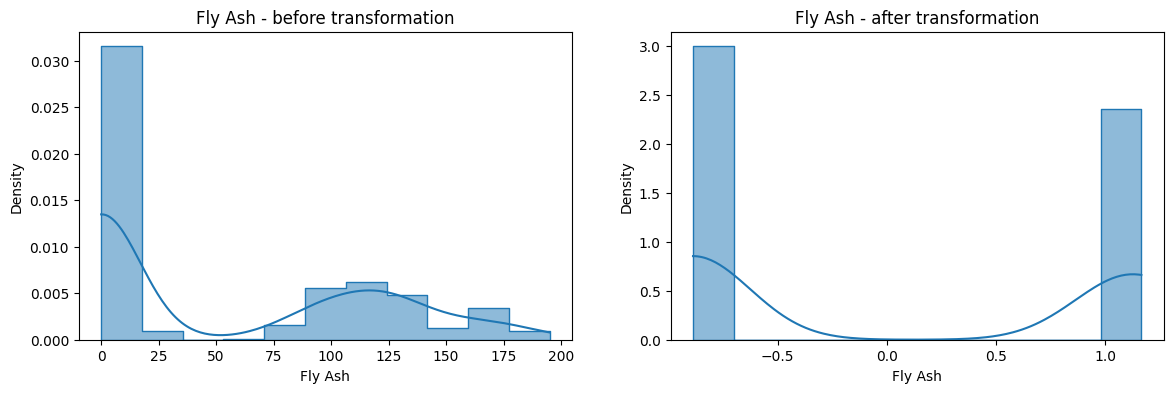

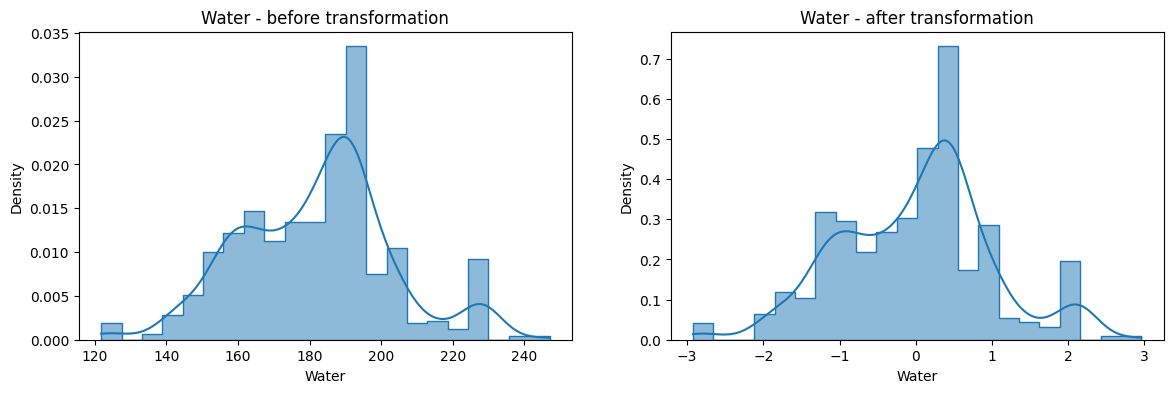

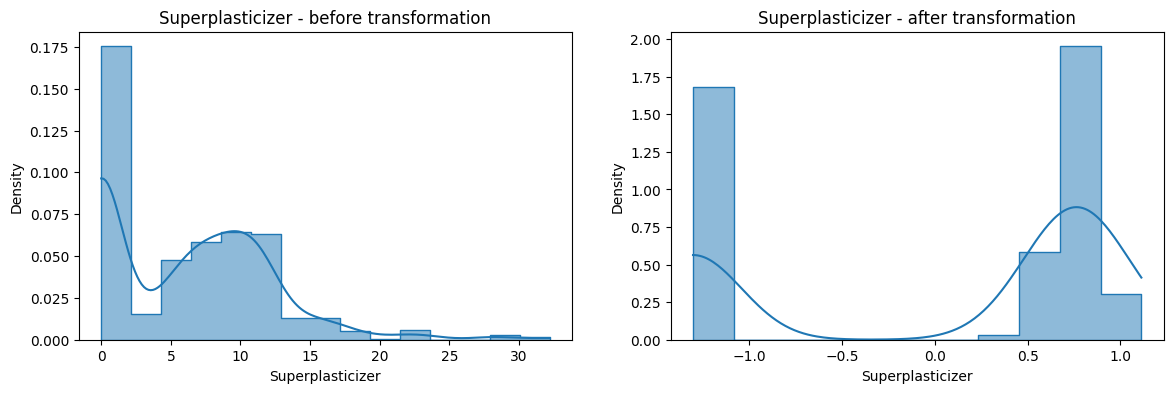

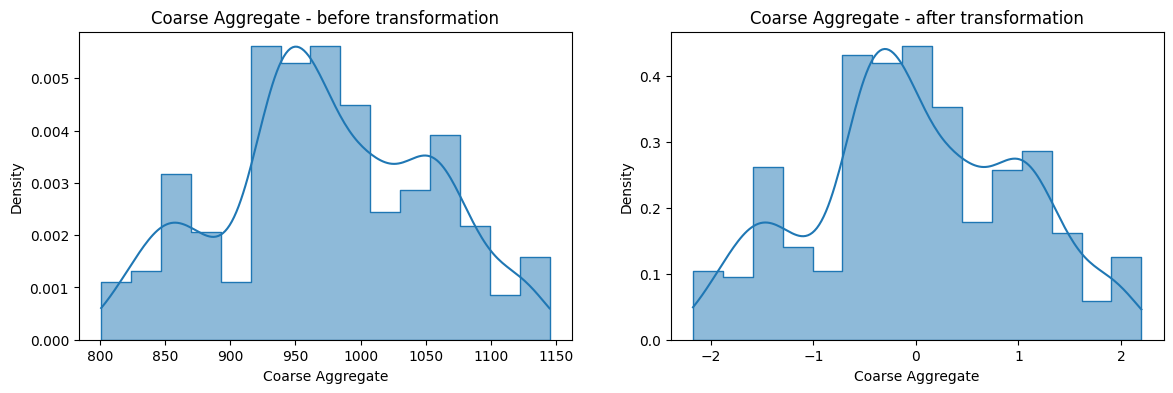

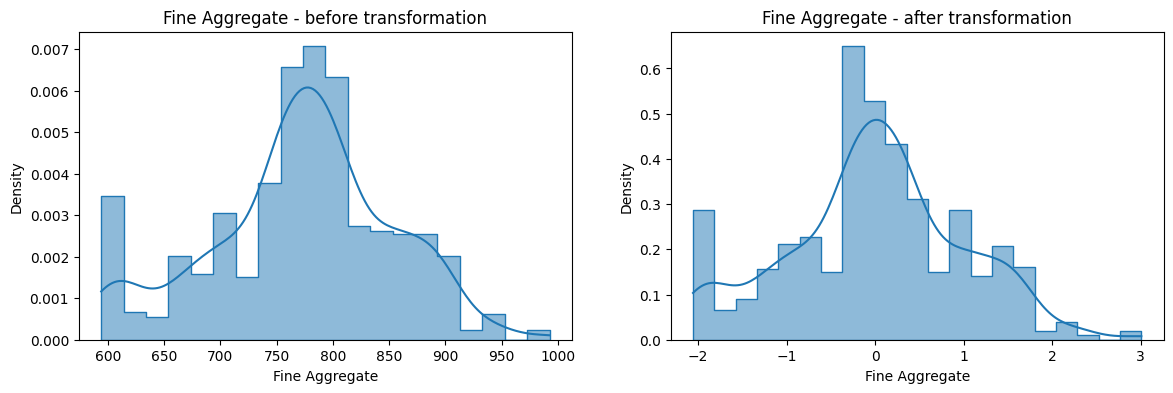

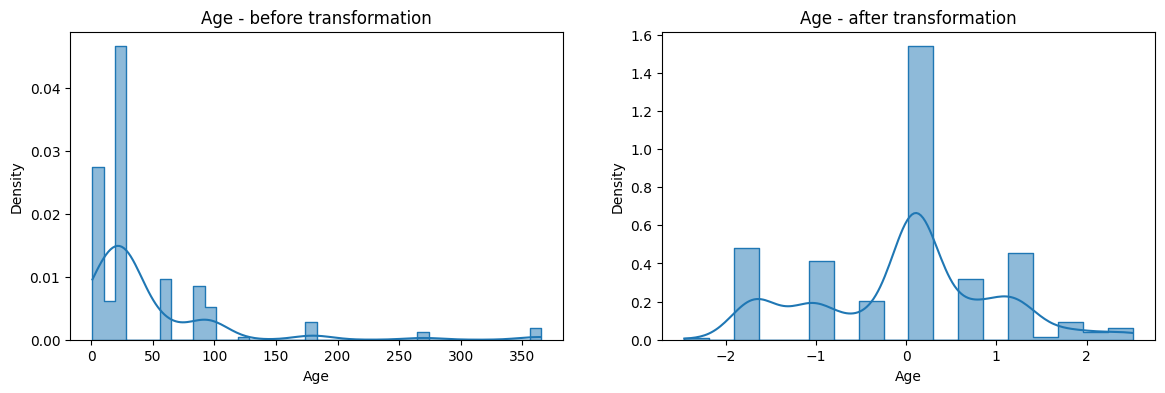

In [16]:
# convert transformed training data to dataframe with original column names
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

# loop through each feature/column in transformed training data
for col in x_train_transformed.columns:
  plt.figure(figsize=(14, 4))  # set figure size

  # plot histogram + kde of original feature
  plt.subplot(121)
  sns.histplot(x_train[col], kde=True, stat="density", element="step", fill=True)
  plt.title(f'{col} - before transformation')

  # plot histogram + kde of transformed feature
  plt.subplot(122)
  sns.histplot(x_train_transformed[col], kde=True, stat="density", element="step", fill=True)
  plt.title(f'{col} - after transformation')

  # display plots side by side
  plt.show()

- Cement: slightly right skewed to normal
- Blast Furnace Slag: Bimodal (both model normally distributed)
- Fly Ash: Bimodal (both model normally distributed)
- Water: same as it is
- Superplasticizer: Slightly improved
- Course Aggregate: same as it is
- Fine Aggregate: same as it is
- Age: right skewed to normal

## **Apply Yeo-Johnson Transform**

In [17]:
# initialize PowerTransformer (default method is yeo-johnson)
pt1 = PowerTransformer()

# fit transformer on training data and transform it
x_train_transformed2 = pt1.fit_transform(x_train)

# apply same transformation to test data
x_test_transformed2 = pt1.transform(x_test)

# create LinearRegression model and fit on transformed training data
lr = LinearRegression()
lr.fit(x_train_transformed2, y_train)

# predict target values for transformed test data
y_pred3 = lr.predict(x_test_transformed2)

# print r2 score to evaluate model performance
print(r2_score(y_test, y_pred3))

# display yeo-johnson lambda values for each feature
pd.DataFrame({'cols': x_train.columns, 'yeo_johnson_lambdas': pt1.lambdas_})

0.8161906512004999


,cols,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [18]:
# initialize PowerTransformer (default yeo-johnson)
pt = PowerTransformer()

# fit transformer on full features and transform
x_transformed2 = pt.fit_transform(x)

# create LinearRegression model
lr = LinearRegression()

# perform 10 fold cross validation on transformed data
# print average r2 score
np.mean(cross_val_score(lr, x_transformed2, y, scoring='r2'))

np.float64(0.6834625141500866)

## **Before & After comparision for Yeo-Johnson Plot**

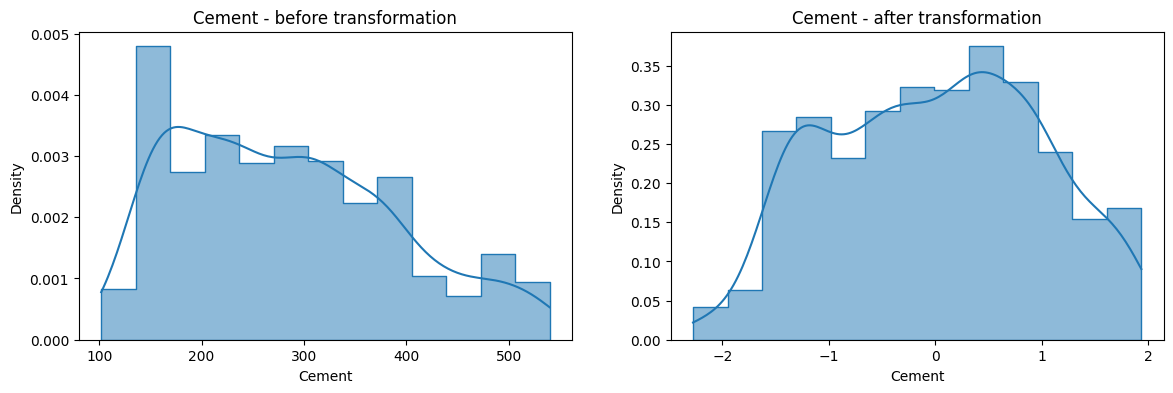

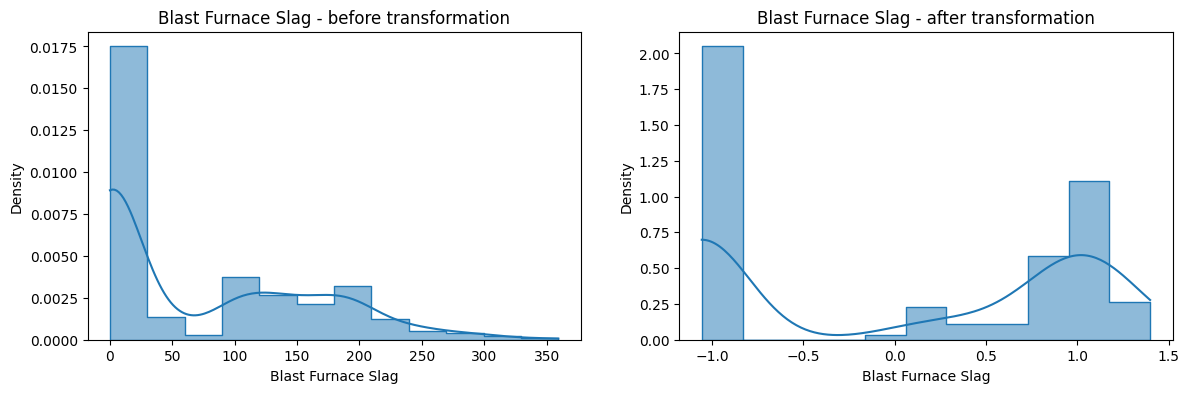

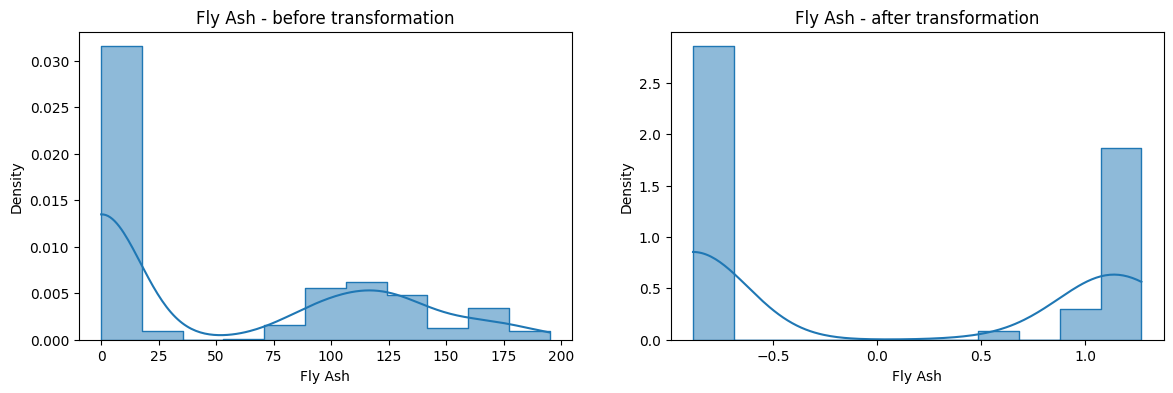

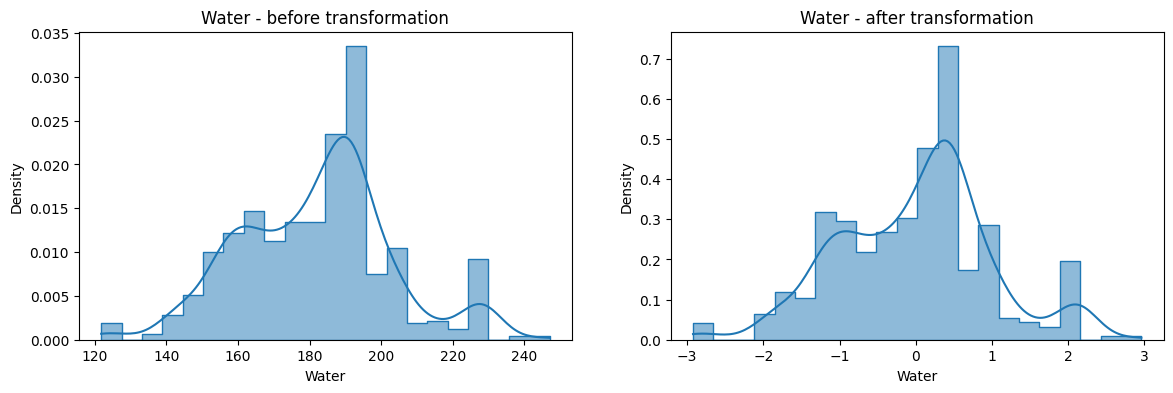

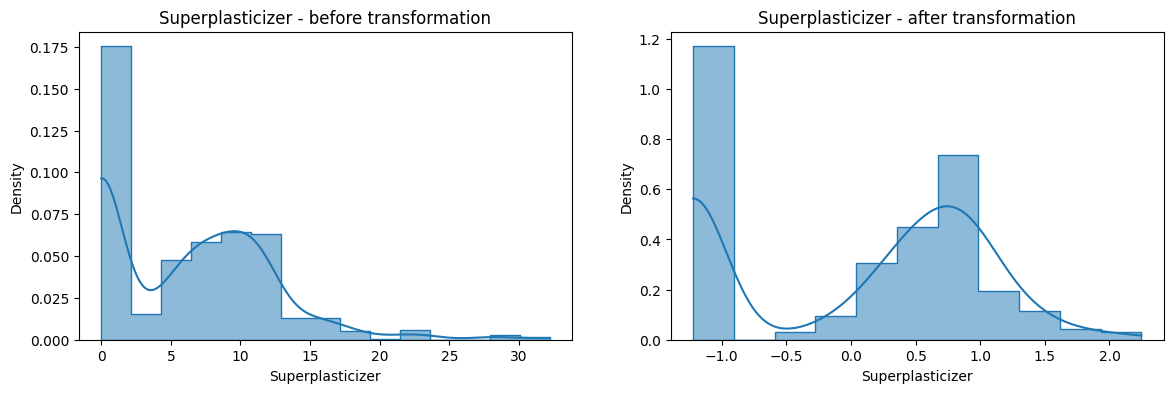

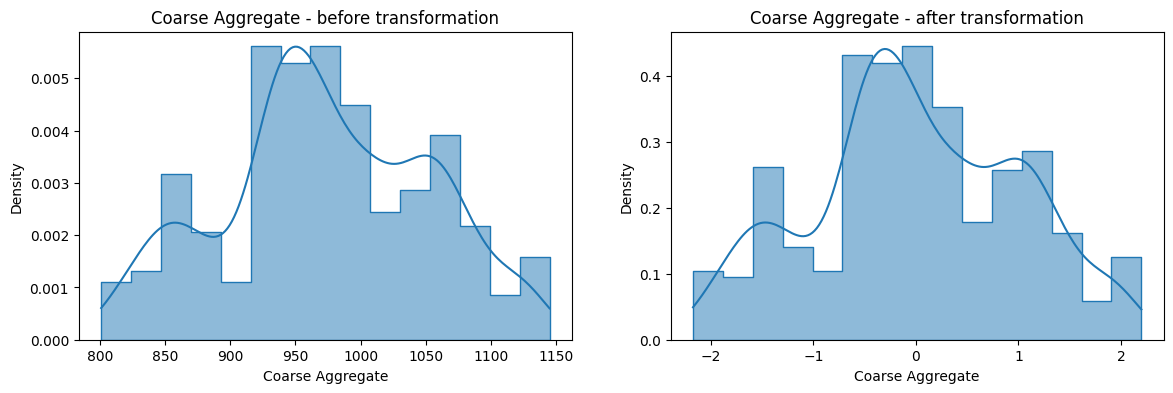

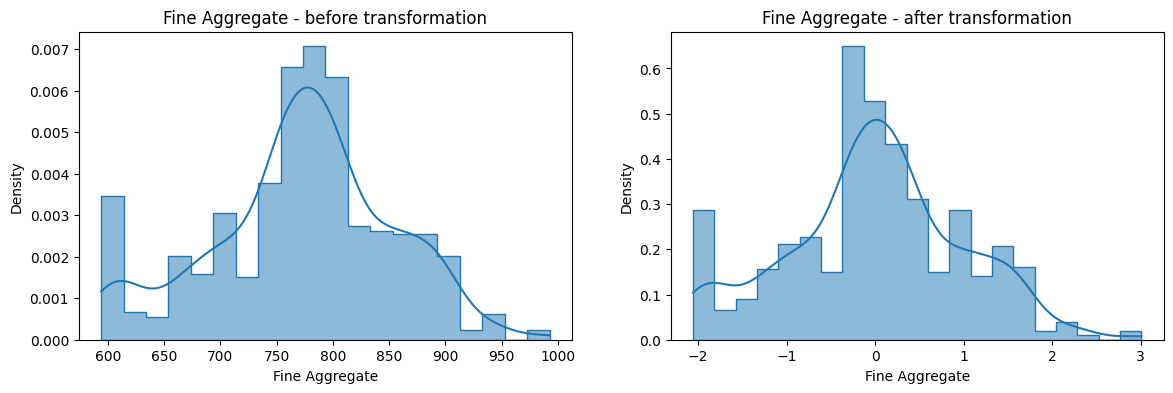

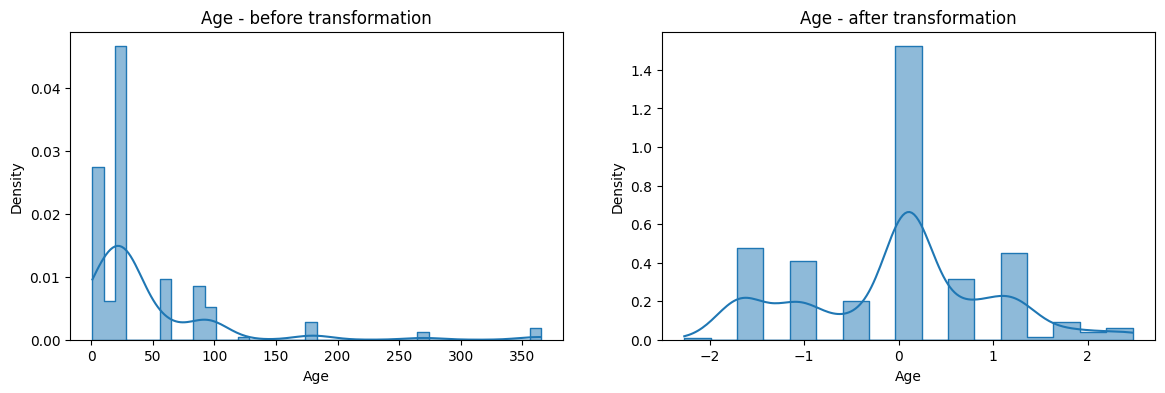

In [19]:
# convert transformed numpy array to dataframe with original column names
x_train_transformed2 = pd.DataFrame(x_train_transformed2, columns=x_train.columns)

# loop through each feature to visualize transformation effect
for col in x_train_transformed2.columns:

  # create figure for each feature
  plt.figure(figsize=(14, 4))

  # plot histogram + kde of original data
  plt.subplot(121)
  sns.histplot(x_train[col], kde=True, stat="density", element="step", fill=True)
  plt.title(f'{col} - before transformation')

  # plot histogram + kde of transformed data
  plt.subplot(122)
  sns.histplot(x_train_transformed2[col], kde=True, stat="density", element="step", fill=True)
  plt.title(f'{col} - after transformation')

  # show plots side by side
  plt.show()

- Not enough difference

## **Comparision: Box-Cox & Yeo-Johnson Transform**

In [20]:
# create dataframe comparing transformation lambdas for each feature
# 'cols' : original column names
# 'box_cox_lambdas' : lambda values from box-cox transformation
# 'yeo_johnson_lambdas' : lambda values from yeo-johnson transformation
pd.DataFrame({
    'cols': x_train.columns,
    'box_cox_lambdas': pt.lambdas_,
    'yeo_johnson_lambdas': pt1.lambdas_
})

,cols,box_cox_lambdas,yeo_johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
